# Probabilities, Likelihoods, and Bayes Theorem

Created: 08/25/2023 by Tom Lever

Updated: 08/25/2023 by Tom Lever

**SUMMARY**: In this notebook we will be reviewing some probability distributions, showing histograms and scatterplots to visualize the distributions in Python in Section 1. In Section 2 we define likelihoods, and show how to compute them in Python. In Section 3 we explain Bayes Theorem, and show how to use Bayes Theorem to compute the posterior probability for parameters based on observed data, using the likelihoods from Section 2.

## Section 1

In this section we generate samples from a variety of distributions and use seaborn and matplotlib to plot the resulting data.

First 5 values from uniform distribution:
[ 5.47846204 13.6710907  13.20238194 12.14829642 10.07040186]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\2369518994.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


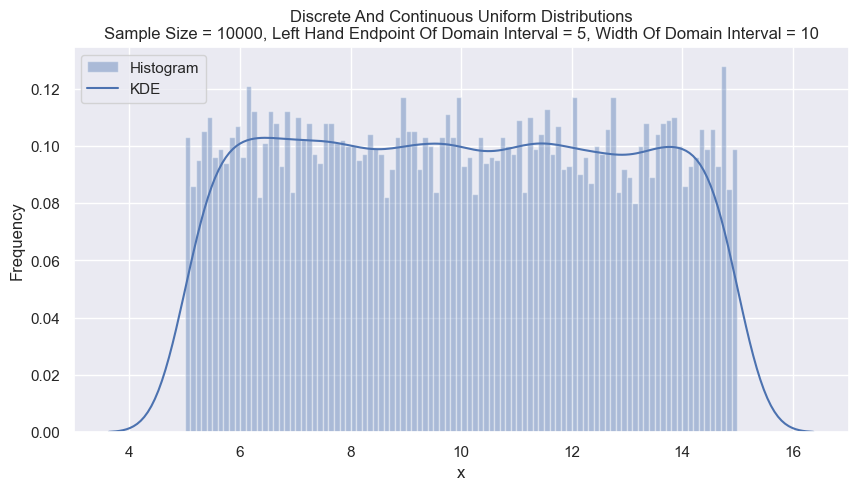

In [1]:
from scipy.stats import uniform
sample_size = 10000
left_hand_endpoint_of_domain_interval = 5
width_of_domain_interval = 10
array_of_uniformly_distributed_random_numbers = uniform.rvs(
    size = sample_size,
    loc = left_hand_endpoint_of_domain_interval,
    scale = width_of_domain_interval
)
print("First 5 values from uniform distribution:")
print(array_of_uniformly_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_uniformly_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Discrete And Continuous Uniform Distributions"
        + f"\nSample Size = {sample_size}, Left Hand Endpoint Of Domain Interval = {left_hand_endpoint_of_domain_interval}, Width Of Domain Interval = {width_of_domain_interval}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Discrete_And_Continuous_Uniform_Distributions.png")
plt.show()

First 5 values from normal distribution:
[1.93355236 0.22852037 2.87465414 1.5225047  3.75071879]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\2142670968.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


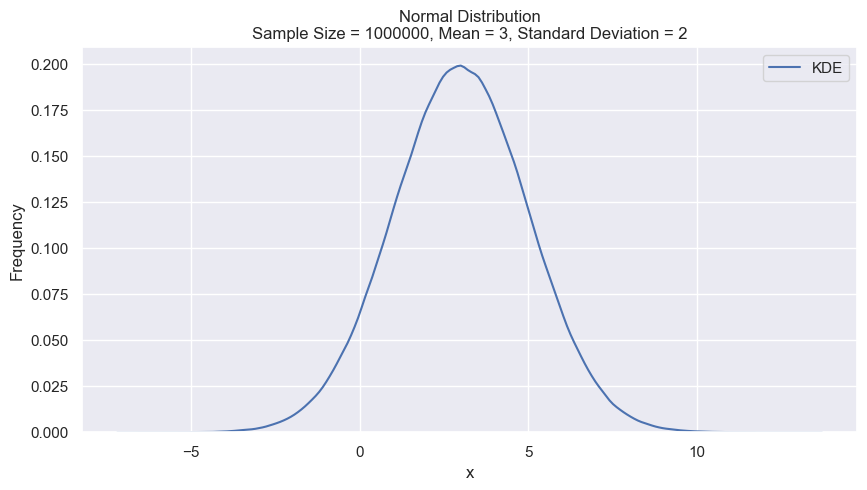

In [2]:
from scipy.stats import norm
sample_size = 1000000
mean = 3
standard_deviation = 2
array_of_normally_distributed_random_numbers = norm.rvs(
    size = sample_size,
    loc = mean,
    scale = standard_deviation
)
print("First 5 values from normal distribution:")
print(array_of_normally_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_normally_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist = False
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Normal Distribution"
        + f"\nSample Size = {sample_size}, Mean = {mean}, Standard Deviation = {standard_deviation}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Normal_Distribution.png")
plt.show()

In [3]:
array_of_normally_distributed_numbers = norm.rvs(size = 100, loc = 3, scale = 2)
print(array_of_normally_distributed_numbers)

[ 3.12335424e+00  1.26004759e+00  1.14281649e+00 -6.23818428e-01
  4.35794184e+00  4.98978600e+00  1.02999139e+00  3.41192588e+00
  5.87158479e+00  2.52206638e+00  2.63553209e+00  6.96722348e+00
  1.35606906e+00  4.59132773e+00  5.73975520e+00  3.55459218e+00
  1.65903192e+00  4.28710980e+00  1.69254386e+00  5.89621940e+00
  3.45448009e+00  4.27812284e+00  7.22000461e+00  6.32273083e+00
  1.22845380e+00  3.24493384e+00  2.20658118e+00  4.68508371e+00
  1.26671276e+00  6.22821058e+00  3.49548083e+00  2.14043867e+00
  3.96395081e+00  3.97528250e+00  4.89484116e+00  1.40684155e+00
  1.48828517e+00  3.72574589e+00  5.54613409e+00  4.65288960e+00
  2.61953919e+00  2.27291487e-01  9.29915191e-01  1.80472225e+00
  4.71793992e+00  3.79156435e+00  3.13082817e+00  1.69523928e+00
  8.23980586e+00  4.21858489e+00  4.89141294e+00  1.89160639e+00
  3.03391308e+00  2.43660305e+00  5.18418936e+00  2.68574648e+00
  2.16783596e+00  2.76328158e+00  6.60812358e-01  4.77934076e-01
  1.74375640e+00  4.32202

First 5 values from Bernoulli distribution:
[0 0 1 0 0]


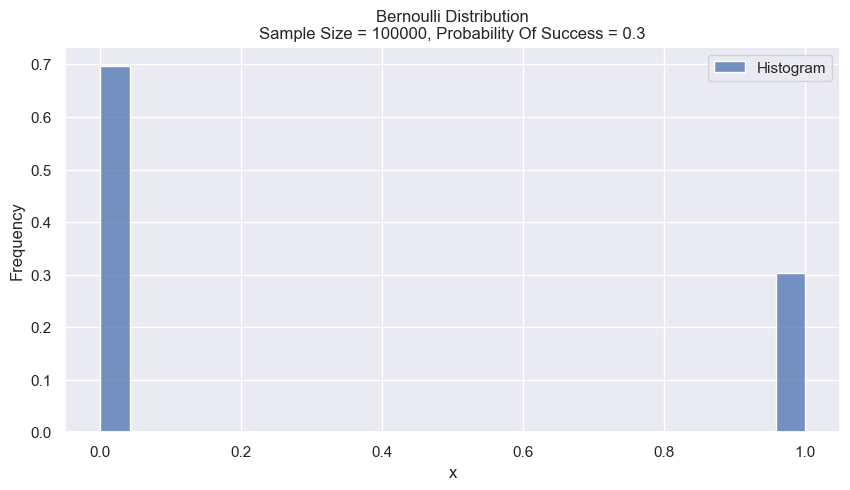

In [4]:
from scipy.stats import bernoulli
sample_size = 100000
probability_of_success = 0.3
array_of_Bernoulli_distributed_random_numbers = bernoulli.rvs(
    size = sample_size,
    p = probability_of_success
)
print('First 5 values from Bernoulli distribution:')
print(array_of_Bernoulli_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Bernoulli_distributed_random_numbers,                  
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel='x',
    ylabel='Frequency',
    title = (
        "Bernoulli Distribution"
        + f"\nSample Size = {sample_size}, Probability Of Success = {probability_of_success}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Bernoulli_Distribution.png")
plt.show()

First 5 values from binomial distribution:
[8 7 7 ... 5 7 8]


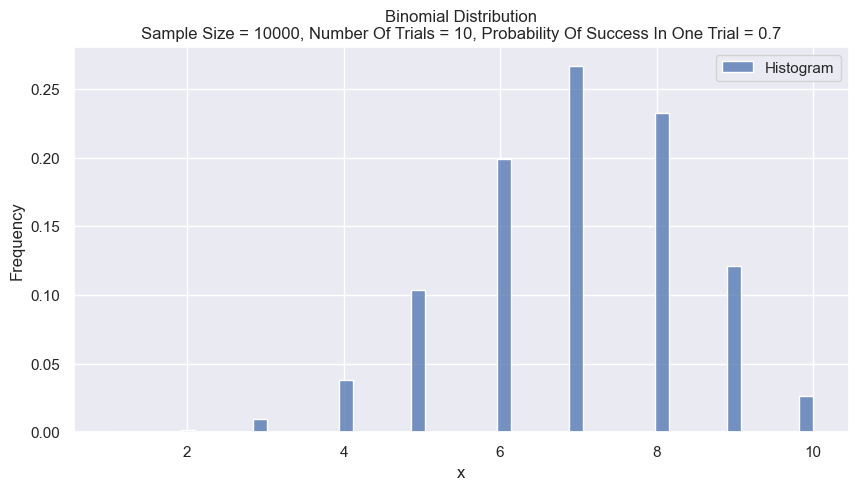

In [5]:
from scipy.stats import binom
sample_size = 10000
number_of_trials = 10
probability_of_success_in_one_trial = 0.7
array_of_binomially_distributed_numbers = binom.rvs(
    size = sample_size,
    n = number_of_trials,
    p = probability_of_success_in_one_trial
)
print("First 5 values from binomial distribution:")
print(array_of_binomially_distributed_numbers)
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_binomially_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Binomial Distribution"
        + f"\nSample Size = {sample_size}, Number Of Trials = {number_of_trials}, Probability Of Success In One Trial = {probability_of_success_in_one_trial}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Binomial_Distribution.png")
plt.show()

First 5 values from Poisson distribution:
[3 4 3 3 5]


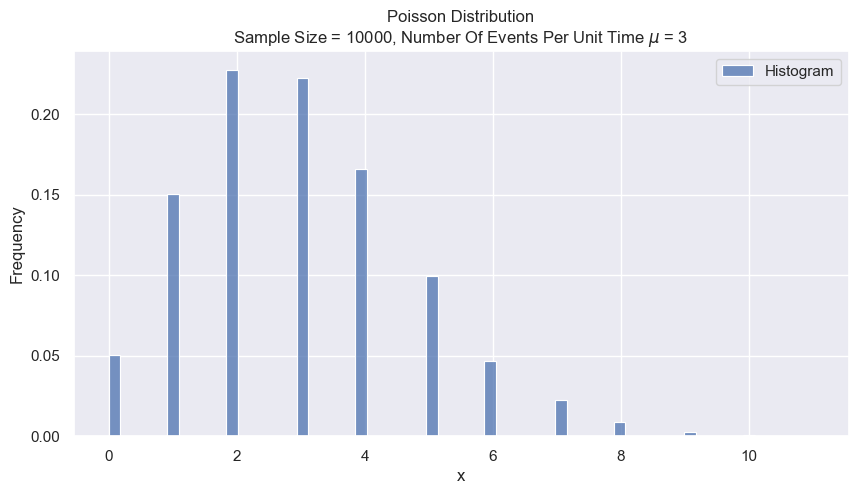

In [6]:
from scipy.stats import poisson
sample_size = 10000
number_of_events_per_unit_time_mu = 3
array_of_Poisson_distributed_numbers = poisson.rvs(
    size = sample_size,
    mu = number_of_events_per_unit_time_mu
)
print("First 5 values from Poisson distribution:")
print(array_of_Poisson_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Poisson_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Poisson Distribution"
        + f"\nSample Size = {sample_size}, Number Of Events Per Unit Time " + r"$\mu$" + f" = {number_of_events_per_unit_time_mu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Poisson_Distribution.png")
plt.show()

First 5 values from Beta distribution:
[0.14941798 0.22038889 0.38378479 0.12558482 0.12911978]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\1727283562.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


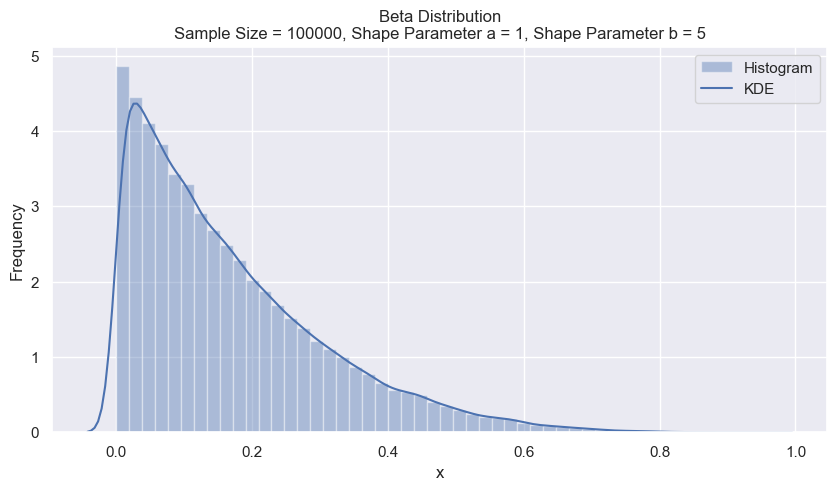

In [7]:
from scipy.stats import beta
sample_size = 100000
shape_parameter_a = 1
shape_parameter_b = 5
array_of_Beta_distributed_numbers = beta.rvs(
    size = sample_size,
    a = shape_parameter_a,
    b = shape_parameter_b
)
print("First 5 values from Beta distribution:")
print(array_of_Beta_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Beta_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Beta Distribution"
        + f"\nSample Size = {sample_size}, Shape Parameter a = {shape_parameter_a}, Shape Parameter b = {shape_parameter_b}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Beta_Distribution.png")
plt.show()

First 5 values from Gamma distribution:
[ 7.11506317 11.13649919  4.23520937  7.20160136  7.87008099]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\1689612271.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


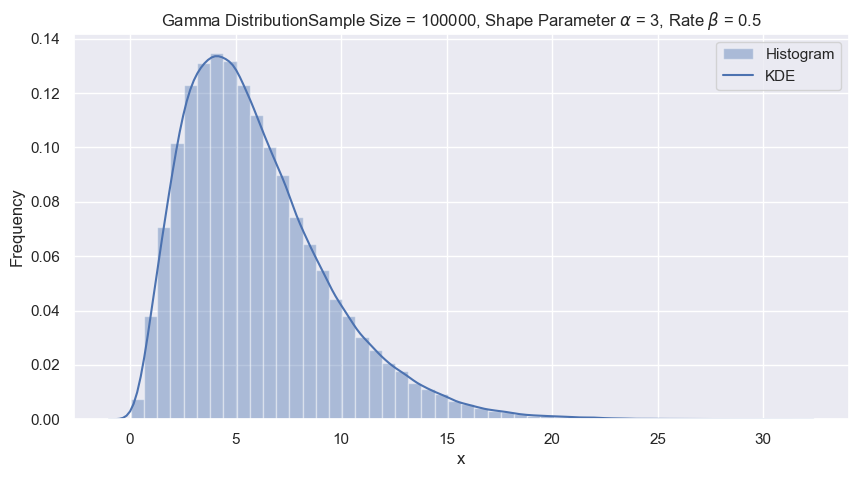

In [8]:
from scipy.stats import gamma
sample_size = 100000
shape_parameter_alpha = 3
rate_beta = 1 / 2
array_of_Gamma_distributed_random_numbers = gamma.rvs(
    size = sample_size,
    a = shape_parameter_alpha,
    scale = 1 / rate_beta
)
print("First 5 values from Gamma distribution:")
print(array_of_Gamma_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    array_of_Gamma_distributed_random_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        f"Gamma Distribution"
        + f"Sample Size = {sample_size}, Shape Parameter " + r"$\alpha$" + f" = {shape_parameter_alpha}, Rate " + r"$\beta$" + f" = {rate_beta}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Gamma_Distribution.png")
plt.show()


In [9]:
print('Comparing the data mean to the distribution mean:')
import numpy as np
print(np.mean(array_of_Gamma_distributed_random_numbers))
print(shape_parameter_alpha / rate_beta)

Comparing the data mean to the distribution mean:
6.000572111901443
6.0


First 5 values from Student's t distribution:
[-0.49571551  1.55293237 -0.75736443 -0.70374949  0.87503283]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\1364990886.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


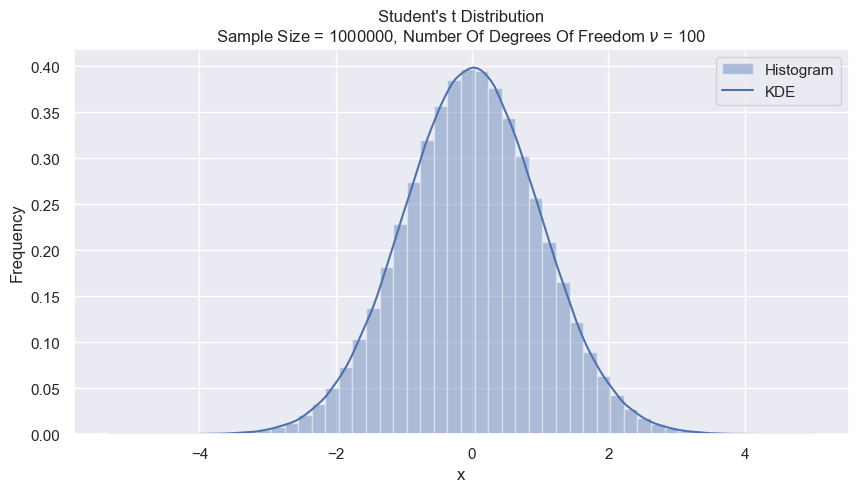

In [10]:
from scipy.stats import t
sample_size = 1000000
number_of_degrees_of_freedom_nu = 100
array_of_Students_t_distributed_numbers = t.rvs(
    size = sample_size,
    df = number_of_degrees_of_freedom_nu
)
print("First 5 values from Student's t distribution:")
print(array_of_Students_t_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Students_t_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Student's t Distribution"
        + f"\nSample Size = {sample_size}, Number Of Degrees Of Freedom " + r"$\nu$" + f" = {number_of_degrees_of_freedom_nu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Students_t_Distribution.png")
plt.show()

First 5 values from Cauchy distribution:
[-1.25983077  0.40995496 -7.32937264 -0.79966888 -0.2280444 ]


C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\1685033659.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


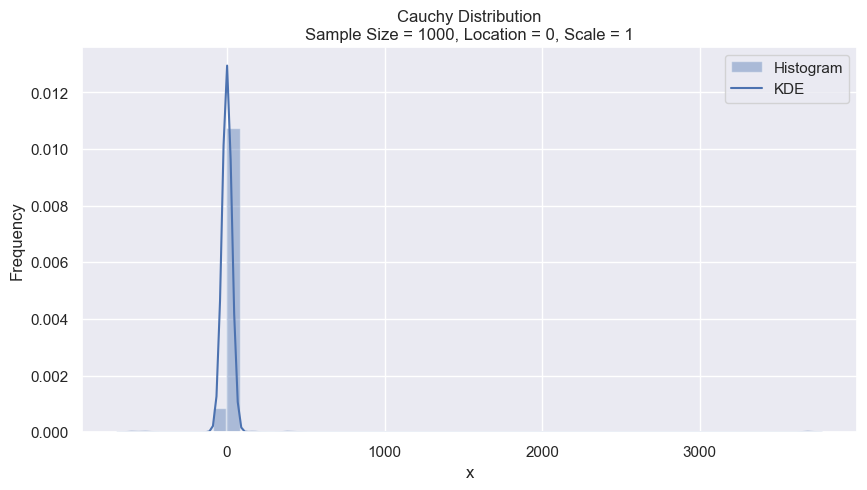

In [11]:
from scipy.stats import cauchy
sample_size = 1000
location = 0
scale = 1
array_of_Cauchy_distributed_numbers = cauchy.rvs(
    size = sample_size,
    loc = location,
    scale = scale
)
print("First 5 values from Cauchy distribution:")
print(array_of_Cauchy_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Cauchy_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Cauchy Distribution"
        + f"\nSample Size = {sample_size}, Location = {location}, Scale = {scale}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Cauchy_Distribution.png")
plt.show()

C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\2382496598.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  the_Axes = sns.kdeplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_2008\2382496598.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  the_Axes = sns.kdeplot(


[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Continuous Shading Plot Of Multivariate Normally Distributed Random Pairs')]

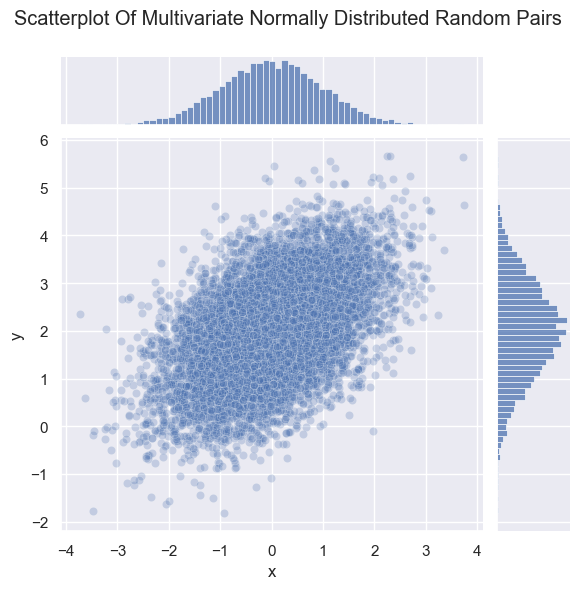

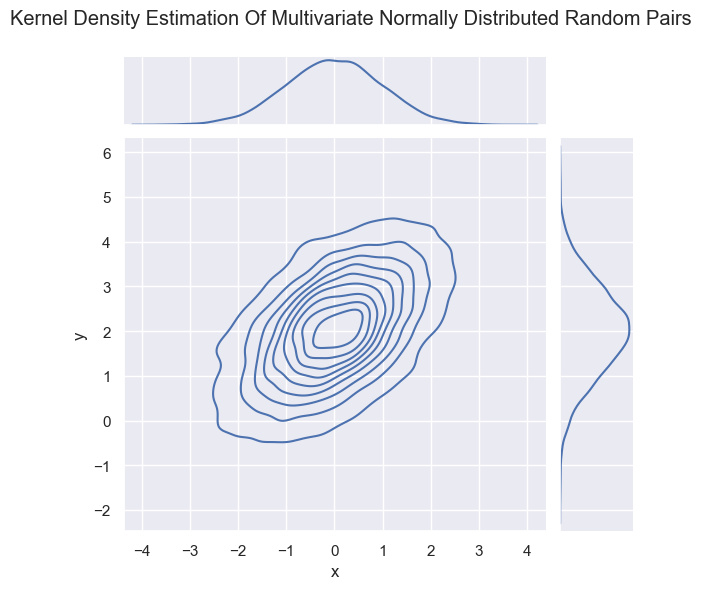

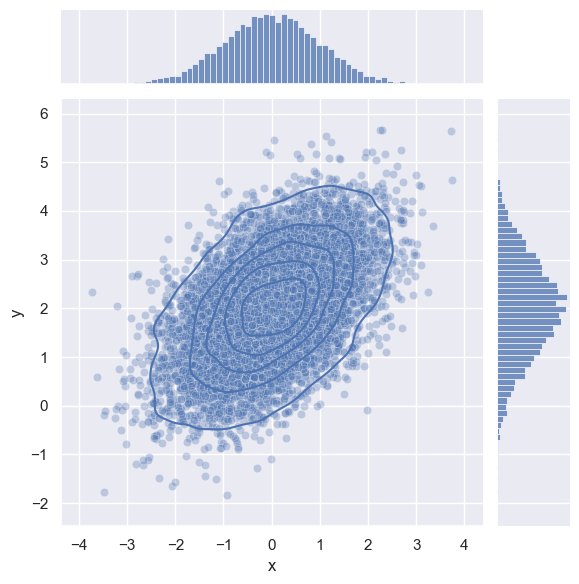

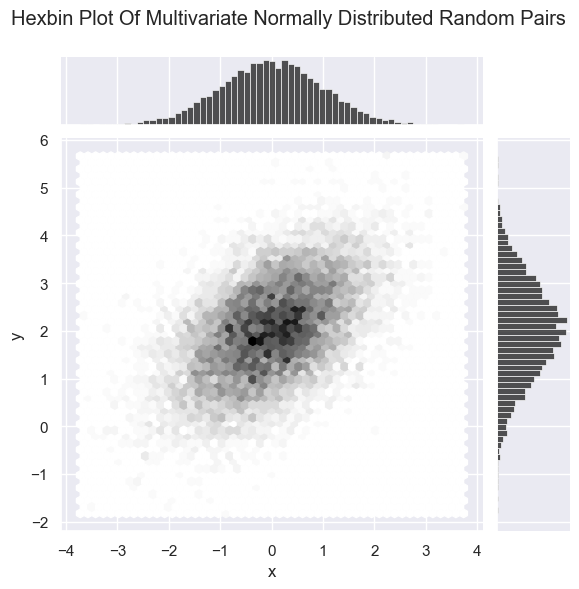

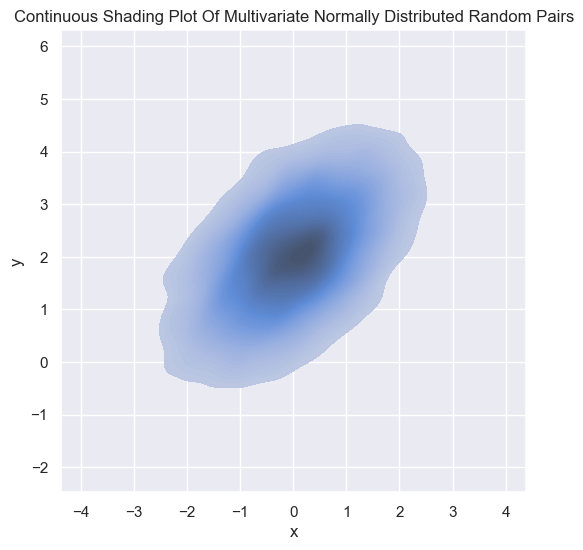

In [12]:
sample_size = 10000
mean = [0, 2]
covariance = [
    (1, 0.5),
    (0.5, 1)
]
array_of_multivariate_normally_distributed_random_pairs = np.random.multivariate_normal(
    mean = mean,
    cov = covariance,
    size = sample_size
)
import pandas as pd
data_frame_of_multivariate_normally_distributed_random_pairs = pd.DataFrame(
    data = array_of_multivariate_normally_distributed_random_pairs,
    columns = ["x", "y"]
)
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, alpha = 0.25)
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Scatterplot Of Multivariate Normally Distributed Random Pairs")

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, kind = "kde")
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Kernel Density Estimation Of Multivariate Normally Distributed Random Pairs")

the_Axes = sns.jointplot(
    x = "x",
    y = "y",
    data = data_frame_of_multivariate_normally_distributed_random_pairs,
    alpha = 0.3
)
the_Axes = the_Axes.plot_joint(
    sns.kdeplot,
    zorder = 1,
    n_levels = 6
)

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, kind = "hex", color = "k")
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Hexbin Plot Of Multivariate Normally Distributed Random Pairs")

figure, the_Axes = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
the_Axes = sns.kdeplot(
    x = data_frame_of_multivariate_normally_distributed_random_pairs.x,
    y = data_frame_of_multivariate_normally_distributed_random_pairs.y,
    palette = cmap,
    n_levels = 60,
    shade = True
)
the_Axes.set(
    xlabel = "x",
    ylabel = "y",
    title = f"Continuous Shading Plot Of Multivariate Normally Distributed Random Pairs"
)

In [14]:
print("Compute eigenvalues and eigenvectors of covariance to compare to plots:")
import numpy as np
tuple_of_eigenvalues_and_eigenvectors = np.linalg.eig(covariance)
print(f"Eigenvalues: {tuple_of_eigenvalues_and_eigenvectors[0]}")
print(f"Eigenvectors: {tuple_of_eigenvalues_and_eigenvectors[1]}")

Compute eigenvalues and eigenvectors of covariance to compare to plots:
Eigenvalues: [1.5 0.5]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The Wishart distribution is a little different because the support of the distribution is the set of $p \times p$ positive definite matrices. We create and view one sample instead of a plot.

In [15]:
from scipy.stats import wishart
number_of_degrees_of_freedom = 2
scale = np.asarray([[2, 1], [1, 2]])
array_of_3_Wishart_distributed_random_matrices_with_height_and_width_equal_to_number_of_degrees_of_freedom = wishart.rvs(
    number_of_degrees_of_freedom,
    scale,
    size = 3
)
array_of_3_Wishart_distributed_random_matrices_with_height_and_width_equal_to_number_of_degrees_of_freedom

array([[[ 5.18983602, -1.22997299],
        [-1.22997299,  0.58119734]],

       [[ 5.04824904,  7.52184127],
        [ 7.52184127, 12.46047191]],

       [[ 0.62624307,  0.61291559],
        [ 0.61291559,  0.68198012]]])